In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn.preprocessing import MinMaxScaler
np.set_printoptions(suppress=True)

In [2]:
def Gaussian(X,x,b):
    return (1./(np.sqrt(2 * np.pi) * b)) * np.exp(-np.square((X-x))/(2* b **2))

In [3]:
def es1 ( estimates10, estimates20,estimates11,estimates12):
    tp=0
    tn = 0
    fp =0
    fn = 0
    for i in range (len(estimates10)):
        if(estimates10[i]>estimates20[i]):
            tp+=1
        else:
            fn+=1
    for i in range(len(estimates11)):
        if(estimates11[i]<estimates12[i]):
            tn+=1
        else:
            fp+=1
    print("Confusion Matrix")
    print("  class1     class2   <<-- Classified as   ")
  # print("   %.2f    %.2f  yes" %(tp,fn))
  # print("   %.2f    %.2f  no" %(fp,tn))
    print("   "+repr(int(tp))+"       "+repr(int(fn))+"          class1")
    print("   "+repr(int(fp))+"        "+repr(int(tn))+"          class2")
    acc = float((tp+tn)/(tp+tn+fp+fn))
    print("Accuracy: "+repr(acc))
    
    return tp,fp,tn,fn

In [4]:
def plot(t1,t2,z,title):
    

    #print(t)
    plt.rcParams['figure.figsize'] = [8, 3]
    plt.rcParams['figure.dpi'] = 100
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.subplot(1,2,1)
    
    plt.title(title+"1"+"-"+title+"2"+" (Domain)")
    
    plt.scatter(t1[0], t1[1],label='Class 1')
    plt.scatter(t2[0],t2[1],label = 'Class 2')
    
    plt.legend( loc='upper left')
    
    plt.xlabel(title+"1")
    plt.ylabel(title+"2")
    
    plt.axis([-z, z, -z, z])
    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    #plt.show()
    
    plt.subplot(1,2,2)
    
    plt.title(title+"2"+"-"+title+"3"+" (Domain)")
    
    plt.scatter(t1[1],t1[2],label='Class 1')
    plt.scatter(t2[1],t2[2],label = 'Class 2')
    
    plt.legend( loc='upper left')
    
    plt.xlabel(title+"2")
    plt.ylabel(title+"3")
    
    plt.axis([-z, z, -z, z])
    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    plt.show()
# # def plot_distribution_with_line(X1,X2):
# # #     X1 = np.reshape(X1,(200,1))
# # #     X2 = np.reshape(X2,(200,1))
    
# #     plt.plot(X1,X2)
# #     plt.show()
    

In [5]:
def diagonalize(X1,X2,M1,M2,sigmaX1,sigmaX2,printing):
    [eigenvalues1, eigenvectors1] = np.linalg.eig(sigmaX1)
    [eigenvalues2, eigenvectors2] = np.linalg.eig(sigmaX2)

    PT = np.transpose(eigenvectors1)     
    #print("X1: "+repr(np.shape(X1)))
    #Multiplying PT with each values 
    Y1 = np.matmul(PT,X1)
    Y2 = np.matmul(PT,X2)
    
    MY1 = np.matmul(PT,M1)
    MY2 = np.matmul(PT,M2)
    
    sigmaY1=np.matmul(np.matmul(PT,sigmaX1),eigenvectors1)
    

    
    sigmaY2 = np.matmul(np.matmul(PT,sigmaX2),eigenvectors1)

    
   

    #plot(Y1,Y2,35,'Y')
    

    #sigmaY1 = float(sigmaY1)
    L_Inv = fractional_matrix_power(sigmaY1, -0.5)
    
    
    
    z1 = np.matmul(L_Inv,Y1)
    z2 = np.matmul(L_Inv,Y2)
    MZ1 = np.matmul(L_Inv,MY1)
    MZ2 = np.matmul(L_Inv,MY2)
    
    sigmaZ1 = np.matmul(np.matmul(L_Inv,sigmaY1),L_Inv)
    sigmaZ2 = np.matmul(np.matmul(L_Inv,sigmaY2),L_Inv)
    

    
    #plot(z1,z2,15,'Z')
    #A,B,C = coefficents_discriminant_function(MZ1,MZ2,sigmaz1,sigmaz2,P1,P2)
    #discriminant_plot(z1,z2,A,B,C,'Z',10)
    

    [l2,P2 ] = np.linalg.eig(sigmaZ2)
    P2T = P2.T
    

    V1 = np.matmul(P2T,z1)
    V2 = np.matmul(P2T,z2)
    MV1 = np.matmul(P2T,MZ1)
    MV2 = np.matmul(P2T,MZ2)
    
#     print(np.shape(MV1))
#     print(np.shape(MV2))
        
    sigmaV1 = np.matmul(np.matmul(P2T,sigmaZ1),P2)
    sigmaV2 = np.matmul(np.matmul(P2T,sigmaZ2),P2)
    
    #plot(V1,V2,10,'V')
    #discriminant_plot(V1,V2,A,B,C,'V',10) 
    
       
    if printing==True:
        
        print("---------EigenValues1--------")
        print(eigenvalues1)
        print("---------PT------------------")
        print(PT)
        print("---------SigmaX1-------------")   
        print(sigmaX1)
        print("---------P-------------------")
        print(eigenvectors1)        
        print("-------SigmaY1---------")
        print(sigmaY1)
        print("-------SigmaY2------")
        print(sigmaY2) 
        print("---------SigmaY1^-1/2-------")
        print(L_Inv)
        print("---------SigmaZ1---------")
        print(sigmaZ1)
        print("---------SigmaZ2---------")
        print(sigmaZ2)       
        print("-------Eigenvalues of SigmaZ2---------")
        print(l2)
        print("-------P2------------------")
        print(P2)
        print("-------P2 Transpose--------")
        print(P2T)
        print("-------SigmaV1-------------")
        print(sigmaV1)
        print("-------SigmaV2-------------")
        print(sigmaV2)
        print("-------MV1----------")
        print(MV1)
        print("-------MV2----------")
        print(MV2)
    
    return V1,V2,sigmaV1,sigmaV2,MV1,MV2
    


In [6]:
def coefficents_discriminant_function(M1,M2,cov1,cov2,P1,P2):
    cov1_inv = np.linalg.inv(cov1)
    cov2_inv = np.linalg.inv(cov2)
    A = (cov2_inv-cov1_inv)/2
    B = np.matmul(M1.T,cov1_inv)-np.matmul(M2.T,cov2_inv)
    C = np.log(np.linalg.det(cov2)/np.linalg.det(cov1))/2 + np.log(P1/P2)+ (np.matmul(np.matmul(M2.T,cov2_inv),M2)-np.matmul(np.matmul(M1.T,cov1_inv),M1))/2
    
#     A = np.subtract(cov2-cov1)
#     B = np.subtract(np.matmul(M1.T,cov1),np.matmul(M2.T,cov2))
#     C = np.log(np.linalg.det(cov2)/np.linalg.det(cov1))/2 + np.log(P1/P2)+ (np.subtract(np.matmul(np.matmul(M2.T,cov2),M2),np.matmul(np.matmul(M1.T,cov1),M1)))/2
    
    return A,B,C


In [7]:
def discriminant_function(X1,X2,A,B,C):        

    num_of_col = X1.shape[1]
    #print(num_of_col)
    temp1=[]
    temp2 =[]   
    for i in range(num_of_col):
        col = [row[i] for row in X1]
        col1 = [row1[i] for row1 in X2]


        temp1.append(np.matmul(np.matmul(col,A),col)+np.matmul(B,col)+C)
        temp2.append(np.matmul(np.matmul(col1,A),col)+np.matmul(B,col1)+C)
        
        
        
#     for i in X1:
#         temp1.append(d(i[0],i[1],i[2],A,B,C))
#     for i in X2:
#         temp2.append(d(i[0],i[1],i[2],A,B,C))
        
    
#     temp1 =np.reshape(temp1,(num_of_col,1))
#     temp2 =np.reshape(temp2,(num_of_col,1))
    return temp1,temp2,num_of_col
def Accuracy(temp1,temp2):
    temp1 = np.asarray(temp1)
    temp2 = np.asarray(temp2)   
    num_points = temp1.shape[0]
    tp =0
    tn = 0
    fp=0
    fn=0
    l=0

    #print(np.shape(temp1))
    for i in temp1:
        #print(i)
        if i>=0:
            tp+=1
        else:
            fn+=1
    for i in temp2:
        if i<0:
            tn+=1
        else:
            fp+=1
    print("Confusion Matrix")
    print("  class1     class2   <<-- Classified as   ")
  # print("   %.2f    %.2f  yes" %(tp,fn))
  # print("   %.2f    %.2f  no" %(fp,tn))
    print("   "+repr(int(tp))+"       "+repr(int(fn))+"          class1")
    print("   "+repr(int(fp))+"        "+repr(int(tn))+"          class2")
    acc = float((tp+tn)/(tp+tn+fp+fn))
    print("Accuracy: "+repr(acc))
    return tp,fp,tn,fn

In [8]:
def d(X,Y,Z,A,B,C):
    
    
    B = np.asarray(B)
    
    #C = np.asarray(C)
    #F = []            
    #F.append(A[0][0]*(X[0]**2) + 2*A [0][2]*X[0]*X[2] + 2*A[1][2]*X[1]*X[2] + A[1][1]*(X[1]**2) + A[2][2]*(X[2]**2) + B[0]*X[0]+ B[1]*X[1] + B[2]*X[2] + C)
    F = A[0][0]*(X**2)+ 2*A[0][1]*X*Y + 2*A[0][2]*X*Z + 2*A[1][2]*Y*Z + A[1][1]*(Y**2)+ A[2][2]*(Z**2) + B[0][0]*X + B[0][1]*Y + B[0][2]*Z +C 
    
    #print(np.shape(F))
    return F
    

def discriminant_function_plot(X1,X2,A,B,C,title,z,level):
    delta = 0.50
    xrange = np.arange(-1000,1000,delta)
    yrange = np.arange(-1000,1000,delta)
    
    X,Y = np.meshgrid(xrange,yrange)
    
    F = d(X,Y,0,A,B,C)
    F1 = d(0,X,Y,A,B,C)
    
    
        
    plt.rcParams['figure.figsize'] = [8, 3]
    plt.rcParams['figure.dpi'] = 100
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.subplot(1,2,1)
    
    plt.title(title+"1"+"-"+title+"2"+" (Domain)")
    
    plt.contour(X,Y,F,[level])
    plt.scatter(X1[0], X1[1],label='Class 1')
    plt.scatter(X2[0],X2[1],label = 'Class 2')
    
    plt.legend( loc='upper left')
    
    plt.xlabel(title+"1")
    plt.ylabel(title+"2")
    
    plt.axis([-z, z, -z, z])
    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    #plt.show()
    
    plt.subplot(1,2,2)
    
    plt.title(title+"2"+"-"+title+"3"+" (Domain)")
    
    plt.contour(X,Y,F1,[level])
    plt.scatter(X1[1], X1[2],label='Class 1')
    plt.scatter(X2[1],X2[2],label = 'Class 2' )
    
    plt.legend( loc='upper left')
    
    plt.xlabel(title+"2")
    plt.ylabel(title+"3")
    
    plt.axis([-z, z, -z, z])
    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    plt.show()
    
    


In [9]:
def plot_linear_discriminantfunction(X1,X2,W,title,z,k):
    
    
    def f(X,Y,Z,W,k):
        if k=='HoKashyp':
            a = W[0]+ W[1]*X+W[2]*Y+W[3]*Z
        elif k=='Fisher':
            a = W[0]*X + W[1]*Y + W[2]*Z
        return a
    
    delta = 5
    xrange = np.arange(-10000,10000,delta)
    yrange = np.arange(-10000,10000,delta)
    
    X,Y = np.meshgrid(xrange,yrange)
    
    F = f(X,Y,0,W,k)
    F1 = f(0,X,Y,W,k)
    
    
        
    plt.rcParams['figure.figsize'] = [8, 3]
    plt.rcParams['figure.dpi'] = 100
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.subplot(1,2,1)
    
    plt.title(title+"1"+"-"+title+"2"+" (Domain)")
    
    plt.contour(X,Y,F,[0],colors='red')
    plt.scatter(X1[0], X1[1],label='Class 1')
    plt.scatter(X2[0],X2[1],label = 'Class 2')
    
    plt.legend( loc='upper left')
    
    plt.xlabel(title+"1")
    plt.ylabel(title+"2")
    
    plt.axis([-z, z, -z, z])
    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    #plt.show()
    
    plt.subplot(1,2,2)
    
    plt.title(title+"2"+"-"+title+"3"+" (Domain)")
    
    plt.contour(X,Y,F1,[0],colors='red')
    plt.scatter(X1[1], X1[2],label='Class 1')
    plt.scatter(X2[1],X2[2],label = 'Class 2' )
    
    plt.legend( loc='upper left')
    
    plt.xlabel(title+"2")
    plt.ylabel(title+"3")
    
    plt.axis([-z, z, -z, z])
    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    plt.show()
    

In [88]:
def plot_linear_discriminantfunction1(X1,X2,W,title,z,k):
    
    
    def f(X,Y,Z,W,k):
        if k=='HoKashyp':
            a = W[0]+ W[1]*X+W[2]*Y+W[3]*Z
        elif k=='Fisher':
            a = W[0]*X + W[1]*Y + W[2]*Z
        return a
    
    delta = 5
    xrange = np.arange(-10000,10000,delta)
    yrange = np.arange(-10000,10000,delta)
    
    X,Y = np.meshgrid(xrange,yrange)
    
    F = f(X,Y,0,W,k)
    F1 = f(0,X,Y,W,k)
    
    
        
    plt.rcParams['figure.figsize'] = [8, 3]
    plt.rcParams['figure.dpi'] = 100
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.subplot(1,2,1)
    
    plt.title(title+"1"+"-"+title+"2"+" (Domain)")
    
    plt.contour(X,Y,F,[0],colors='red')
    plt.scatter((X1[0]*W[0]+X1[1]*W[1]), (X1[0]*W[0]+X1[1]*W[1]), label='Class 1')
    plt.scatter((X2[0]*W[0]+X1[1]*W[1]),(X2[0]*W[0]+X1[1]*W[1]), label = 'Class 2')
    
    plt.legend( loc='upper left')
    
    plt.xlabel(title+"1")
    plt.ylabel(title+"2")
    
    plt.axis([-z, z, -z, z])
    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    #plt.show()
    
    plt.subplot(1,2,2)
    
    plt.title(title+"2"+"-"+title+"3"+" (Domain)")
    
    plt.contour(X,Y,F1,[0],colors='red')
    plt.scatter((X1[0]*W[0]+X1[1]*W[1]), (X1[0]*W[0]+X1[1]*W[1]),label='Class 1')
    plt.scatter((X2[0]*W[0]+X1[1]*W[1]),(X2[0]*W[0]+X1[1]*W[1]),label = 'Class 2' )
    
    plt.legend( loc='upper left')
    
    plt.xlabel(title+"2")
    plt.ylabel(title+"3")
    
    plt.axis([-z, z, -z, z])
    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    plt.show()
    

In [10]:
def Maximum_likelihood(X1,X2):
    #print(X1.shape[0])
#     M1 = np.mean(X1,axis=1)
#     M2 = np.mean(X2,axis=1)
# #     print("M1: "+repr(M1))
# #     print("M2: "+repr(M2))
# #     print(np.shape(M1))
# #     print(np.shape(M2))
#     M1=np.reshape(M1,(X1.shape[0],1))
#     M2=np.reshape(M2,(X1.shape[0],1))
# #     print(np.shape(M1))
# #     print(np.shape(M2))
    
#     cov1 = np.cov(X1)
#     cov2 = np.cov(X2)
#     print("SigmaX1(numpy): "+repr(cov1))
#     print("SigmaX2(numpy): "+repr(cov2))
#     print(np.shape(cov1))
#     print(np.shape(cov2))

#     #Without using Library
    M1 = X1.sum(axis=1)/X1.shape[1]
    M1 = M1.reshape(M1.shape[0],1)
    M2 = X2.sum(axis=1)/X2.shape[1]
    M2 = M2.reshape(M2.shape[0],1)
    
    demeaned1 = X1-M1
    cov1 = (demeaned1 @ demeaned1.T) / (X1.shape[1]-1)
    
    demeaned2 = X2-M2
    cov2 = (demeaned2 @ demeaned2.T) / (X1.shape[1]-1)
    
#     print("Mean1: "+repr(M1))
#     print("Covariance1: "+repr(cov1))
#     print("Mean2: "+repr(M2))
#     print("Covariance1: "+repr(cov2))
    




    return M1,M2,cov1,cov2

In [11]:
def Bayesian_Estimation(X1,X2):
    
    M1_ML,M2_ML,cov1_ML,cov2_ML = Maximum_likelihood(X1,X2)
#     print(M1)
#     print(M1_ML)
#     cov1 = np.asarray(cov1)
#     cov2 = np.asarray(cov2)
    #rint(type(cov1))
    #Number of Samples
#     M1 = X1[:,0]
#     M2 = X2[:,0]
#     M1=np.reshape(M1,(X1.shape[0],1))
#     M2=np.reshape(M2,(X1.shape[0],1))
    M1 = np.zeros((X1.shape[0],1))
    M2 = np.zeros((X2.shape[0],1))
    n = X1.shape[1]
    sigma0 = np.identity(X1.shape[0])
    same = np.linalg.inv((cov1_ML/n)+sigma0)

    s = cov1_ML*same
    

    prior1 = (1/n)*s @ M1
    
    current1 = (sigma0 @same) @ M1_ML
    M1_Bayes = prior1+current1
    
    M1_Bayes = np.asarray(M1_Bayes)
    
#     print("Bayes: "+repr(M1_Bayes))
#     print("ML: "+repr(M1_ML))
#     print("Absolute: "+repr(M1))
#     print("COV2: "+repr(np.shape(cov2_ML)))
#     print("same: "+repr(np.shape(same)))
#     print("M1: "+repr(np.shape(M2)))
    
    s2 = cov2_ML *same
#     print("s2: "+repr(np.shape(s2)))
    
    prior2 = (1/n)*s2 @ M2
#     print(np.shape(prior1))
    
    
    current2 =sigma0 @same @ M2_ML
    M2_Bayes = prior2+current2
    
    M2_Bayes = np.asarray(M2_Bayes)
    
#     print("Bayes: "+repr(M2_Bayes))
#     print("ML: "+repr(M2_ML))
#     print("Absolute: "+repr(M2))
    
    return M1_Bayes,M2_Bayes,cov1_ML,cov2_ML,M1,M2 

In [12]:
def k_fold_crossvalidation_ML(kfolds,X1,X2,num_of_points):
    dimension = X1.shape[0]
    acc=[]
    tp = []
    fp = []
    tn = []
    fn = []
    # my dimension is 3*200 for simplyfying I did transpose 
    X1 = X1.T
    X2 = X2.T
    #print("X1: "+repr(X1))
    # l is the number of points in each partition
    l= int((num_of_points/kfolds))
    iteration=1
    
    for i  in range(num_of_points):
        if(i%(num_of_points/kfolds)==0 and (i+l)<=num_of_points):
            train1 = []
            train2 = []
            test1=[]
            test2=[]
            print("Folds "+repr(iteration))
            iteration +=1
            for j in range(i,i+l):
                test1.append(X1[j])
                test2.append(X2[j])
            
            
#             print("Train before reshape" )
#             print(train1)
            test1 = np.reshape(test1,(l,dimension))
            test2 = np.reshape(test2,(l,dimension))
            #using Tranpose because maximum likelihood receives dimension*num_of_points 
            test1 = test1.T
            test2 = test2.T
#             print("Test after reshape" )
#             print(train1)
#             print(np.shape(test1))
#             print()
#             print()
            
            if(i==0):
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])
            else:
                
                for m in range(0,i):
                    train1.append(X1[m])
                    train2.append(X2[m])
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])
#                 if((i==k) and (i+l)<=num_of_points ):
#                     k=i+l
#                     test1.append(X1[k])
            
    
    
#             print("test before reshape" )
#             print(test1)
            train1 = np.reshape(train1,(num_of_points-l,dimension))
            train2 = np.reshape(train2,(num_of_points-l,dimension))
            train1 = train1.T
            train2 = train2.T
#             print("test after reshape" )
#             print(test1)

#             print("Train")
#             print(test1)
#             print(np.shape(train1))
#             print()
#             print()
            EST_M1,EST_M2,EST_cov1,EST_cov2=Maximum_likelihood(train1,train2)
            EST_A,EST_B,EST_C= coefficents_discriminant_function(EST_M1,EST_M2,EST_cov1,EST_cov2,P1,P2)

            temp1,temp2,num_of_col=discriminant_function(test1,test2,EST_A,EST_B,EST_C)
            tp1,fp1,tn1,fn1 = Accuracy(temp1,temp2)
            accu =  float((tp1+tn1)/(tp1+tn1+fp1+fn1))
            acc.append(accu)
            tp.append(tp1)
            fp.append(fp1)
            tn.append(tn1)
            fn.append(fn1)
            #discriminant_plot(X1_test,X2_test,EST_A,EST_B,EST_C,'X',35)
    print("Final Confusion Matrix")
    print("  class1     class2   <<-- Classified as   ")
    print("   "+repr(int(np.mean(tp)))+"       "+repr(int(np.mean(fn)))+"          class1")
    print("   "+repr(int(np.mean(fp)))+"        "+repr(int(np.mean(tn)))+"          class2")
    print("Final Accuracy(MLE): "+repr(np.mean(acc)))
           


In [13]:
def k_fold_crossvalidation_Bayes(kfolds,X1,X2,num_of_points,known_cov1,known_cov2,absolute_M1,absolute_M2):
    dimension = X1.shape[0]
    acc= []
    tp = []
    fp = []
    tn = []
    fn = []
    # my dimension is 3*200 for simplyfying I did transpose 
    X1 = X1.T
    X2 = X2.T
    # l is the number of points in each partition
    l= int(num_of_points/kfolds)
    iteration=1
    
    for i  in range(num_of_points):
        if(i%(num_of_points/kfolds)==0 and (i+l)<=num_of_points):
            train1 = []
            train2 = []
            test1=[]
            test2=[]
            print("Folds "+repr(iteration))
            iteration +=1
            for j in range(i,i+l):
                test1.append(X1[j])
                test2.append(X2[j])
            
            

            test1 = np.reshape(test1,(l,dimension))
            test2 = np.reshape(test2,(l,dimension))
            #using Tranpose because maximum likelihood receives dimension*num_of_points 
            test1 = test1.T
            test2 = test2.T
            
            if(i==0):
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])
            else:
                
                for m in range(0,i):
                    train1.append(X1[m])
                    train2.append(X2[m])
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])

            train1 = np.reshape(train1,(num_of_points-l,dimension))
            train2 = np.reshape(train2,(num_of_points-l,dimension))
            train1 = train1.T
            train2 = train2.T
#             print("Train: "+repr(np.shape(train1)))
#             print("Test: "+repr(np.shape(test1)))
            
            M1_ML,M2_ML,cov1_ML,cov2_ML=Maximum_likelihood(train1,train2)
            M1_Bayes,M2_Bayes,Bayes_cov1,Bayes_cov2,abs_M1,abs_M2=Bayesian_Estimation(train1,train2)
            EST_A,EST_B,EST_C= coefficents_discriminant_function(M1_Bayes,M2_Bayes,Bayes_cov1,Bayes_cov2,P1,P2)

            temp1,temp2,num_of_col=discriminant_function(test1,test2,EST_A,EST_B,EST_C)
            tp1,fp1,tn1,fn1 = Accuracy(temp1,temp2)
            accu =  float((tp1+tn1)/(tp1+tn1+fp1+fn1))
            acc.append(accu)
            tp.append(tp1)
            fp.append(fp1)
            tn.append(tn1)
            fn.append(fn1)
            #discriminant_plot(X1_test,X2_test,EST_A,EST_B,EST_C,'X',35)
    print("Final Confusion Matrix")
    print("  class1     class2   <<-- Classified as   ")
    print("   "+repr(int(np.mean(tp)))+"       "+repr(int(np.mean(fn)))+"          class1")
    print("   "+repr(int(np.mean(fp)))+"        "+repr(int(np.mean(tn)))+"          class2")
    print("Final Accuracy(Bayesian): "+repr(np.mean(acc)))
    
           

In [183]:
df1 = pd.read_csv("data.csv")
df = pd.read_csv("data.csv",usecols = [1,2,3,4,5,6,179])


In [184]:
dataset=df[(df.y == 1) | (df.y == 2)]

In [185]:
dataset = dataset.dropna()
dataset

,X1,X2,X3,X4,X5,X6,y
1,386,382,356,331,320,315,1
7,1,-2,-8,-11,-12,-17,2
8,-278,-246,-215,-191,-177,-167,1
11,-167,-230,-280,-315,-338,-369,1
14,-24,-15,-5,-1,4,3,2
...,...,...,...,...,...,...,...
11491,102,137,158,158,128,92,2
11492,-27,-53,-84,-104,-131,-171,1
11493,-136,-137,-138,-135,-130,-123,2
11495,-22,-22,-23,-26,-36,-42,2


In [186]:
X1 = dataset[dataset.y==1]
X2 = dataset[dataset.y==2]

In [187]:
y1 = X1.y.values
X1 = X1.drop('y',axis=1).values
y2 = X2.y.values
X2 = X2.drop('y',axis=1).values

In [188]:
# scaler = MinMaxScaler()
# X1 = scaler.fit_transform(X1)
# X2 = scaler.fit_transform(X2)
# print(X1)

In [189]:
num_of_points = X1.shape[0] 
X1 = X1.T
X2 = X2.T
P1= 50
P2 = 50
#num_of_points = X1.shape[0]

In [190]:
num_of_points

2300

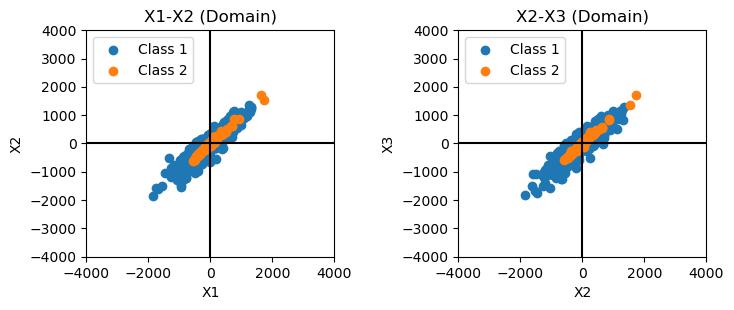

In [137]:
plot(X1,X2,4000,'X')


In [138]:
# plot(EST_V1,EST_V2,20,'V')

Confusion Matrix
  class1     class2   <<-- Classified as   
   1470       830          class1
   76        2224          class2
Accuracy: 0.8030434782608695
Before Diagonalization


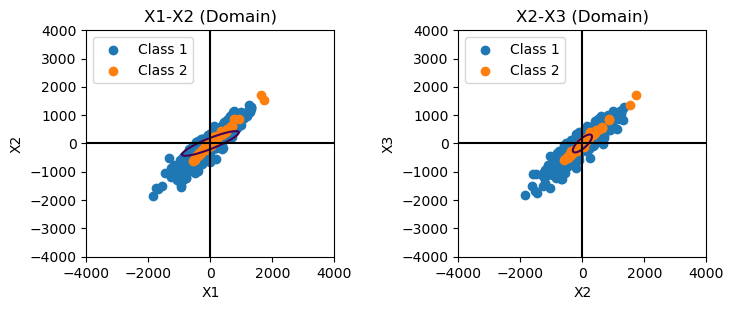

After Diagonalization


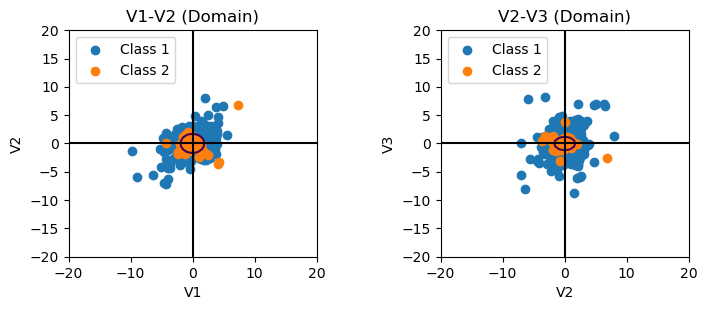

Confusion Matrix
  class1     class2   <<-- Classified as   
   1470       830          class1
   76        2224          class2
Accuracy: 0.8030434782608695


In [139]:
ML_M1,ML_M2,ML_cov1,ML_cov2=Maximum_likelihood(X1,X2)
EST_A,EST_B,EST_C= coefficents_discriminant_function(ML_M1,ML_M2,ML_cov1,ML_cov2,P1,P2)

temp1,temp2,num_of_col=discriminant_function(X1,X2,EST_A,EST_B,EST_C)
tp,fp,tn,fn= Accuracy(temp1,temp2)
print("Before Diagonalization")
discriminant_function_plot(X1,X2,EST_A,EST_B,EST_C,'X',4000,level=1000)
print("After Diagonalization")
EST_V1,EST_V2,EST_sigmaV1,EST_sigmaV2,EST_MV1,EST_MV2=diagonalize(X1,X2,ML_M1,ML_M2,ML_cov1,ML_cov2,False)
EST_VA1,EST_VB1,EST_VC1= coefficents_discriminant_function(EST_MV1,EST_MV2,EST_sigmaV1,EST_sigmaV2,P1,P2)
discriminant_function_plot(EST_V1,EST_V2,EST_VA1,EST_VB1,EST_VC1,'V',20,level=2)    
temp1,temp2,num_of_col=discriminant_function(EST_V1,EST_V2,EST_VA1,EST_VB1,EST_VC1)
tp,fp,tn,fn= Accuracy(temp1,temp2)


In [140]:
print("Parameters (Before Diagonalization) ")
print("Maximum Likelihood")
print("Mean of Class1: ")
print(ML_M1)
print("Mean of Class2: ")
print(ML_M2)
print("Covariance of Class1: ")
print(ML_cov1)
print("Covariance of Class2: ")
print(ML_cov2)


Parameters (Before Diagonalization) 
Maximum Likelihood
Mean of Class1: 
[[-21.93652174]
 [-19.04913043]
 [-15.29391304]
 [ -9.83608696]
 [ -3.7073913 ]
 [  2.73      ]]
Mean of Class2: 
[[-7.71      ]
 [-8.14869565]
 [-8.02      ]
 [-8.05043478]
 [-7.77695652]
 [-8.22086957]]
Covariance of Class1: 
[[117211.69757815 111028.76606048  91806.29139248  65809.67249617
   39461.16584564  18188.83141366]
 [111028.76606048 117922.72355296 109035.25045142  88376.90192352
   61992.83212909  36796.33340148]
 [ 91806.29139248 109035.25045142 113899.25938007 104887.7902589
   85404.20870095  60936.5169552 ]
 [ 65809.67249617  88376.90192352 104887.7902589  110459.73519129
  103189.31608809  85260.6654154 ]
 [ 39461.16584564  61992.83212909  85404.20870095 103189.31608809
  110364.25666566 103739.34176164]
 [ 18188.83141366  36796.33340148  60936.5169552   85260.6654154
  103739.34176164 110850.1345498 ]]
Covariance of Class2: 
[[9125.0515746  8932.82739452 8540.4738321  7976.47048282 7273.55990866

In [141]:
print("Parameters (After Diagonalization) ")
print("Maximum Likelihood")
print("Mean of Class1: ")
print(EST_MV1)
print("Mean of Class2: ")
print(EST_MV2)
print("Covariance of Class1: ")
print(EST_sigmaV1)
print("Covariance of Class2: ")
print(EST_sigmaV2)


Parameters (After Diagonalization) 
Maximum Likelihood
Mean of Class1: 
[[-0.02088162]
 [ 0.03159303]
 [ 0.00032062]
 [-0.06438901]
 [-0.02115814]
 [-0.01530146]]
Mean of Class2: 
[[-0.03416156]
 [ 0.01105984]
 [-0.0064995 ]
 [ 0.01033773]
 [-0.00408977]
 [-0.00093672]]
Covariance of Class1: 
[[ 1.  0. -0.  0.  0.  0.]
 [ 0.  1.  0. -0.  0.  0.]
 [-0.  0.  1.  0. -0. -0.]
 [-0. -0.  0.  1. -0. -0.]
 [ 0. -0.  0. -0.  1. -0.]
 [-0.  0.  0. -0. -0.  1.]]
Covariance of Class2: 
[[ 0.1419477   0.         -0.         -0.          0.         -0.        ]
 [ 0.          0.11286281  0.         -0.          0.          0.        ]
 [-0.          0.          0.05878284  0.          0.          0.        ]
 [-0.         -0.          0.          0.03889143 -0.         -0.        ]
 [ 0.          0.          0.         -0.          0.01481854 -0.        ]
 [-0.          0.          0.         -0.         -0.          0.0160968 ]]


In [142]:
k_fold_crossvalidation_ML(5,X1,X2,num_of_points) 

Folds 1
Confusion Matrix
  class1     class2   <<-- Classified as   
   283       177          class1
   17        443          class2
Accuracy: 0.7891304347826087
Folds 2
Confusion Matrix
  class1     class2   <<-- Classified as   
   298       162          class1
   14        446          class2
Accuracy: 0.808695652173913
Folds 3
Confusion Matrix
  class1     class2   <<-- Classified as   
   313       147          class1
   13        447          class2
Accuracy: 0.8260869565217391
Folds 4
Confusion Matrix
  class1     class2   <<-- Classified as   
   284       176          class1
   11        449          class2
Accuracy: 0.7967391304347826
Folds 5
Confusion Matrix
  class1     class2   <<-- Classified as   
   298       162          class1
   26        434          class2
Accuracy: 0.7956521739130434
Final Confusion Matrix
  class1     class2   <<-- Classified as   
   295       164          class1
   16        443          class2
Final Accuracy(MLE): 0.8032608695652174


In [143]:
#library classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


X = np.concatenate((X1.T,X2.T),axis=0)
print(np.shape(X))
y1 = np.zeros((X1.shape[1],1))
y2 = np.ones((X2.shape[1],1))
Y = np.concatenate((y1,y2),axis=0)
print(np.shape(Y))
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, Y)
prob=clf.predict(X)
prob1,prob2 = np.split(prob,2)
class1 = 0
class2 = 0
for i in range(X1.shape[1]):
    if prob1[i]==y1[i]:
        class1+=1
    if prob2[i]==y2[i]:
        class2+=1
print("Class1: "+repr(class1))
print("Class2: "+repr(class2))
acc = clf.score(X,Y)
print("Accuracy: "+repr(acc))

(4600, 6)
(4600, 1)
Class1: 1470
Class2: 2223
Accuracy: 0.8028260869565217


c:\users\rahba\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix
  class1     class2   <<-- Classified as   
   1466       834          class1
   77        2223          class2
Accuracy: 0.8019565217391305


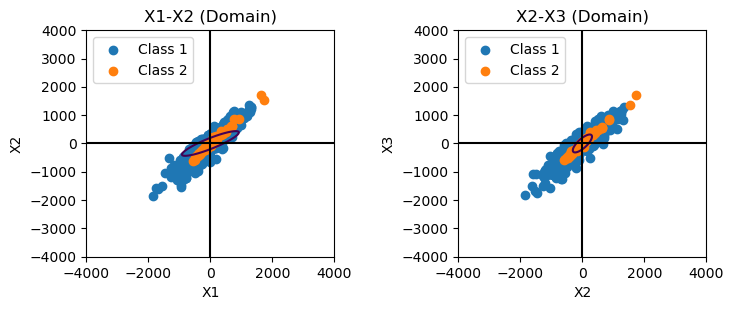

After Diagonalization


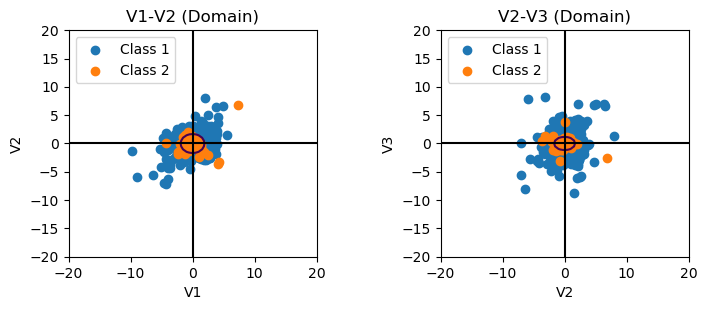

In [144]:
Bayes_M1,Bayes_M2,Bayes_cov1,Bayes_cov2,abs_M1,abs_M2=Bayesian_Estimation(X1,X2)

EST_A,EST_B,EST_C= coefficents_discriminant_function(Bayes_M1,Bayes_M2,Bayes_cov1,Bayes_cov2,P1,P2)

temp1,temp2,num_of_col=discriminant_function(X1,X2,EST_A,EST_B,EST_C)
#print(num_of_col)
# temp1,temp2=discriminant_function(X1_test,X2_test,A,B,C,num_of_points)
acc = Accuracy(temp1,temp2)
#print("Before Diagonalization")
discriminant_function_plot(X1,X2,EST_A,EST_B,EST_C,'X',4000,level=1000)
print("After Diagonalization")
EST_V1,EST_V2,EST_sigmaV1,EST_sigmaV2,EST_MV1,EST_MV2=diagonalize(X1,X2,Bayes_M1,Bayes_M2,Bayes_cov1,Bayes_cov2,False)
#EST_MV1,EST_MV2= Bayesian_Estimation(V1,V2,MV1,MV2,sigmaV1,sigmaV2)
EST_VA1,EST_VB1,EST_VC1= coefficents_discriminant_function(EST_MV1,EST_MV2,EST_sigmaV1,EST_sigmaV2,P1,P2)
discriminant_function_plot(EST_V1,EST_V2,EST_VA1,EST_VB1,EST_VC1,'V',20,level=2)

In [145]:
k_fold_crossvalidation_Bayes(5,X1,X2,num_of_points,Bayes_cov1,Bayes_cov2,abs_M1,abs_M2) 

Folds 1
Confusion Matrix
  class1     class2   <<-- Classified as   
   283       177          class1
   17        443          class2
Accuracy: 0.7891304347826087
Folds 2
Confusion Matrix
  class1     class2   <<-- Classified as   
   298       162          class1
   14        446          class2
Accuracy: 0.808695652173913
Folds 3
Confusion Matrix
  class1     class2   <<-- Classified as   
   314       146          class1
   13        447          class2
Accuracy: 0.8271739130434783
Folds 4
Confusion Matrix
  class1     class2   <<-- Classified as   
   282       178          class1
   11        449          class2
Accuracy: 0.7945652173913044
Folds 5
Confusion Matrix
  class1     class2   <<-- Classified as   
   301       159          class1
   26        434          class2
Accuracy: 0.7989130434782609
Final Confusion Matrix
  class1     class2   <<-- Classified as   
   295       164          class1
   16        443          class2
Final Accuracy(Bayesian): 0.803695652173913


In [146]:
print("Parameters (Before Diagonalization)")
print("Bayesian")
print("Mean of Class1: ")
print(Bayes_M1)
print("Mean of Class2: ")
print(Bayes_M2)
print("Covariance of Class1: ")
print(Bayes_cov1)
print("Covariance of Class2: ")
print(Bayes_cov2)

Parameters (Before Diagonalization)
Bayesian
Mean of Class1: 
[[-0.68910623]
 [ 0.43824161]
 [ 0.03962793]
 [-0.23862698]
 [-0.35126629]
 [ 0.50426978]]
Mean of Class2: 
[[-0.09391867]
 [-0.11470411]
 [ 0.05463279]
 [-0.01741315]
 [ 0.20803181]
 [-0.32173711]]
Covariance of Class1: 
[[117211.69757815 111028.76606048  91806.29139248  65809.67249617
   39461.16584564  18188.83141366]
 [111028.76606048 117922.72355296 109035.25045142  88376.90192352
   61992.83212909  36796.33340148]
 [ 91806.29139248 109035.25045142 113899.25938007 104887.7902589
   85404.20870095  60936.5169552 ]
 [ 65809.67249617  88376.90192352 104887.7902589  110459.73519129
  103189.31608809  85260.6654154 ]
 [ 39461.16584564  61992.83212909  85404.20870095 103189.31608809
  110364.25666566 103739.34176164]
 [ 18188.83141366  36796.33340148  60936.5169552   85260.6654154
  103739.34176164 110850.1345498 ]]
Covariance of Class2: 
[[9125.0515746  8932.82739452 8540.4738321  7976.47048282 7273.55990866
  6601.09583297]

In [147]:
print("Parameters (After Diagonalization)")
print("Bayesian")
print("Mean of Class1: ")
print(EST_MV1)
print("Mean of Class2: ")
print(EST_MV2)
print("Covariance of Class1: ")
print(EST_sigmaV1)
print("Covariance of Class2: ")
print(EST_sigmaV2)


Parameters (After Diagonalization)
Bayesian
Mean of Class1: 
[[ 0.00160391]
 [ 0.00739817]
 [ 0.01070972]
 [-0.02353286]
 [ 0.01370333]
 [ 0.00206174]]
Mean of Class2: 
[[-0.01384565]
 [-0.01071644]
 [ 0.00001061]
 [ 0.00548197]
 [-0.00113073]
 [-0.00226566]]
Covariance of Class1: 
[[ 1.  0. -0.  0.  0.  0.]
 [ 0.  1.  0. -0.  0.  0.]
 [-0.  0.  1.  0. -0. -0.]
 [-0. -0.  0.  1. -0. -0.]
 [ 0. -0.  0. -0.  1. -0.]
 [-0.  0.  0. -0. -0.  1.]]
Covariance of Class2: 
[[ 0.1419477   0.         -0.         -0.          0.         -0.        ]
 [ 0.          0.11286281  0.         -0.          0.          0.        ]
 [-0.          0.          0.05878284  0.          0.          0.        ]
 [-0.         -0.          0.          0.03889143 -0.         -0.        ]
 [ 0.          0.          0.         -0.          0.01481854 -0.        ]
 [-0.          0.          0.         -0.         -0.          0.0160968 ]]


In [148]:
def Fisher_discriminant_function(X1,X2):

    M1 = np.mean(X1.T,axis=0)
    M2 = np.mean(X2.T,axis=0)
    
    cov1 = np.cov(X1)
    cov2 = np.cov(X2)
    S1 = (X1.shape[0]-1) * cov1
    S2 = (X2.shape[0]-1) * cov2
    
    Sw = S1+S2

    Sw_inv = np.linalg.inv(Sw)

    diff = M1-M2
    
    V = Sw_inv @ diff
    

    
    Y1 = V @ X1
    Y2 = V @ X2
    

    return np.asarray(Y1),np.asarray(Y2),np.asarray(V)
    

    

In [149]:
# def k_fold_crossvalidation_Fisher1(kfolds,X1,X2):
#     dimension = X1.shape[0]
#     num_of_points = X1.shape[1]
#     acc=[]
#     tp = []
#     fp = []
#     tn = []
#     fn = []
#     # my dimension is 3*200 for simplyfying I did transpose 
#     X1 = X1.T
#     X2 = X2.T

#     l= int(num_of_points/kfolds)
#     iteration=1
    
#     for i  in range(num_of_points):
#         if(i%(num_of_points/kfolds)==0 and (i+l)<=num_of_points):
#             train1 = []
#             train2 = []
#             test1=[]
#             test2=[]
#             print("Folds "+repr(iteration))
#             iteration +=1
#             for j in range(i,i+l):
#                 test1.append(X1[j])
#                 test2.append(X2[j])
            
            

#             test1 = np.reshape(test1,(l,dimension))
#             test2 = np.reshape(test2,(l,dimension))

#             test1 = test1.T
#             test2 = test2.T

            
#             if(i==0):
#                 for k in range(i+l,num_of_points):
#                     train1.append(X1[k])
#                     train2.append(X2[k])
#             else:
                
#                 for m in range(0,i):
#                     train1.append(X1[m])
#                     train2.append(X2[m])
#                 for k in range(i+l,num_of_points):
#                     train1.append(X1[k])
#                     train2.append(X2[k])

#             train1 = np.reshape(train1,(num_of_points-l,dimension))
#             train2 = np.reshape(train2,(num_of_points-l,dimension))
#             train1 = train1.T
#             train2 = train2.T
            
            
#             M1 = np.mean(train1.T,axis=0)
#             M2 = np.mean(train2.T,axis=0)
    
#             cov1 = np.cov(train1)
#             cov2 = np.cov(train2)
#             S1 = (train1.shape[0]-1) * cov1
#             S2 = (train2.shape[0]-1) * cov2

#             Sw = S1+S2

#             Sw_inv = np.linalg.inv(Sw)

#             diff = M1-M2

#             V = Sw_inv @ diff
#             Y1 = V @ test1
#             Y2 = V @ test2

#             tp1,fp1,tn1,fn1 = Accuracy(Y1,Y2)
#             accu =  float((tp1+tn1)/(tp1+tn1+fp1+fn1))
#             acc.append(accu)            
#             tp.append(tp1)
#             fp.append(fp1)
#             tn.append(tn1)
#             fn.append(fn1)
            
#     print("Final Confusion Matrix")
#     print("  class1     class2   <<-- Classified as   ")
#     print("   "+repr(int(np.mean(tp)))+"       "+repr(int(np.mean(fn)))+"          class1")
#     print("   "+repr(int(np.mean(fp)))+"        "+repr(int(np.mean(tn)))+"          class2")
#     print("Final Accuracy(Fisher): "+repr(np.mean(acc)))
    
           

    

In [150]:
# # Random my theory
# Y1,Y2,V= Fisher_discriminant_function(X1,X2)

# mean1 = np.mean(Y1)
# mean2 = np.mean(Y2)
# std1 = np.std(Y1)
# std2 = np.std(Y2)

# print("Mean1: "+repr(mean1))
# print("Mean2: "+repr(mean2))
# print("Std1: "+repr(std1))
# print("Std2: "+repr(std2))

# def solve(m1,m2,std1,std2):
#   a = 1/(2*std1**2) - 1/(2*std2**2)
#   b = m2/(std2**2) - m1/(std1**2)
#   c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
#   return np.roots([a,b,c])


# # mean1 = 2.5
# # std1 = 1.0
# # mean2 = 5.0
# # std2 = 1.0
# # mean1=2.5
# # std1=3.0
# # mean2=5.0
# # std2=1.0



# result = solve(mean1,mean2,std1,std2)
# print("Intercepts: "+repr(result))

# num_points = Y1.shape[0]
# count1 =0
# count2 = 0
# l=0

# #print(np.shape(temp1))
# for i in Y1:
#     #print(i)
#     if (i<-result[0]) or (i>result[1]):
#         count1+=1
# for i in Y2:
#     if (i>=result[0]) and (i<=result[1]):
#         count2+=1
    

# acc = (count1+count2)/(2*num_points)
# print("Accuracy")
# print("Class1: "+repr(count1))
# print("Class2: "+repr(count2))
# print("acc: "+repr(acc))
# from scipy.stats import norm   
# x = np.linspace(-5,9,10000)
# plot1=plt.plot(x,norm.pdf(x,mean1,std1))
# plot2=plt.plot(x,norm.pdf(x,mean2,std2))
# plot3=plt.plot(result,norm.pdf(result,mean1,std1),'o')
# plt.xlim(-0.05,0.05)
# #acc = Accuracy(Y1,Y2)

In [151]:
# #Threshold formula
# Y1,Y2,V= Fisher_discriminant_function(X1,X2)
# mean1 = np.mean(Y1)
# mean2 = np.mean(Y2)
# std1 = np.std(Y1)
# std2 = np.std(Y2)

# print("Mean1: "+repr(mean1))
# print("Mean2: "+repr(mean2))
# print("Std1: "+repr(std1))
# print("Std2: "+repr(std2))
# threshold = (mean1+mean2)/2
# print("threshold: "+repr(threshold))

# tp =0
# tn = 0
# fp=0
# fn=0
# l=0

# #print(np.shape(temp1))
# for i in Y1:
#     #print(i)
#     if (i> threshold):
#         tp+=1
#     else:
#         fn+=1
        
# for i in Y2:
#     if i< threshold:
#         tn+=1
#     else:
#         fp+=1
    


# print("Confusion Matrix")
# print("  class1     class2   <<-- Classified as   ")

# print("   "+repr(int(tp))+"       "+repr(int(fn))+"          class1")
# print("   "+repr(int(fp))+"        "+repr(int(tn))+"          class2")
# acc = float((tp+tn)/(tp+tn+fp+fn))
# print("Accuracy: "+repr(acc))
# #plot_linear_discriminantfunction(X1,X2,V,'X',4000)

Confusion Matrix
  class1     class2   <<-- Classified as   
   1110       1190          class1
   103        2197          class2
Accuracy: 0.7189130434782609
Before Diagonalization


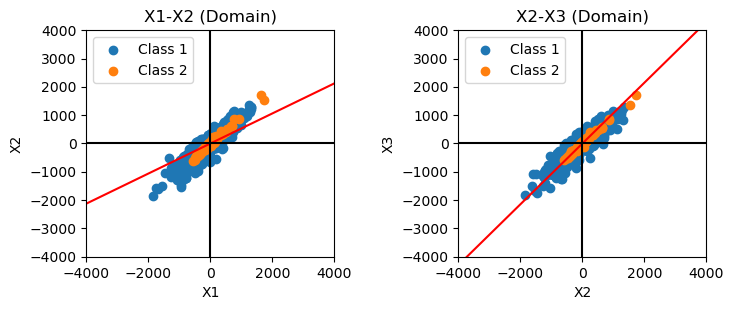

After Diagonalization
Confusion Matrix
  class1     class2   <<-- Classified as   
   1110       1190          class1
   103        2197          class2
Accuracy: 0.7189130434782609


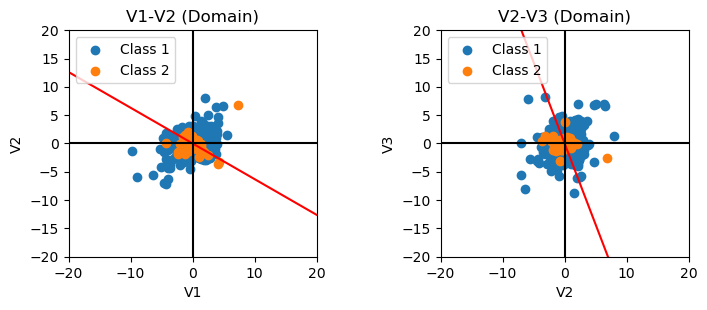

In [152]:
#Density Estimation Formula
Y1,Y2,V= Fisher_discriminant_function(X1,X2)
#print(np.shape(V))
estimatesY1_forY1 = Gaussian(Y1,np.mean(Y1),np.std(Y1))
estimatesY1_forY2 = Gaussian(Y1,np.mean(Y2),np.std(Y2))
estimatesY2_forY1 = Gaussian(Y2,np.mean(Y1),np.std(Y1))
estimatesY2_forY2 = Gaussian(Y2,np.mean(Y2),np.std(Y2))
tp,tn,fp,fn = es1( estimatesY1_forY1, estimatesY1_forY2,estimatesY2_forY1,estimatesY2_forY2)
# print("Confusion Matrix")
# print("  class1     class2   <<-- Classified as   ")

# print("   "+repr(int(tp))+"       "+repr(int(fn))+"          class1")
# print("   "+repr(int(fp))+"        "+repr(int(tn))+"          class2")
# acc = float((tp+tn)/(tp+tn+fp+fn))
# print("Accuracy: "+repr(acc))


print("Before Diagonalization")
plot_linear_discriminantfunction(X1,X2,V,'X',4000,"Fisher")
print("After Diagonalization")
EST_V1,EST_V2,EST_sigmaV1,EST_sigmaV2,EST_MV1,EST_MV2=diagonalize(X1,X2,Bayes_M1,Bayes_M2,Bayes_cov1,Bayes_cov2,False)
#EST_MV1,EST_MV2= Bayesian_Estimation(V1,V2,MV1,MV2,sigmaV1,sigmaV2)
#EST_VA1,EST_VB1,EST_VC1= coefficents_discriminant_function(EST_MV1,EST_MV2,EST_sigmaV1,EST_sigmaV2,P1,P2)

Y1,Y2,V= Fisher_discriminant_function(EST_V1,EST_V2)
estimatesY1_forY1 = Gaussian(Y1,np.mean(Y1),np.std(Y1))
estimatesY1_forY2 = Gaussian(Y1,np.mean(Y2),np.std(Y2))
estimatesY2_forY1 = Gaussian(Y2,np.mean(Y1),np.std(Y1))
estimatesY2_forY2 = Gaussian(Y2,np.mean(Y2),np.std(Y2))
tp,tn,fp,fn = es1( estimatesY1_forY1, estimatesY1_forY2,estimatesY2_forY1,estimatesY2_forY2)
plot_linear_discriminantfunction(EST_V1,EST_V2,V,'V',20,"Fisher")

In [153]:
#Library function
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
X = np.concatenate((X1.T,X2.T),axis=0)
print(np.shape(X))
y1 = np.zeros((X1.shape[1],1))
y2 = np.ones((X2.shape[1],1))
Y = np.concatenate((y1,y2),axis=0)
print(np.shape(Y))
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LinearDiscriminantAnalysis()
clf.fit(X,Y.ravel())
prob=clf.predict(X)
prob1,prob2 = np.split(prob,2)
class1 = 0
class2 = 0
for i in range(X1.shape[1]):
    if prob1[i]==y1[i]:
        class1+=1
    if prob2[i]==y2[i]:
        class2+=1
print("Class1: "+repr(class1))
print("Class2: "+repr(class2))
acc = clf.score(X,Y)
print("Accuracy: "+repr(acc))

(4600, 6)
(4600, 1)
Class1: 1125
Class2: 1391
Accuracy: 0.5469565217391305


In [154]:
# k_fold_crossvalidation_Fisher1(5,X1,X2)

In [155]:
def ajaira(temp1,temp2):
    mean1 = np.mean(temp1)
    mean2 = np.mean(temp2)
    std1 = np.std(temp1)
    std2 = np.std(temp2)

    print("Mean1: "+repr(mean1))
    print("Mean2: "+repr(mean2))
    print("Std1: "+repr(std1))
    print("Std2: "+repr(std2))

    def solve(m1,m2,std1,std2):
      a = 1/(2*std1**2) - 1/(2*std2**2)
      b = m2/(std2**2) - m1/(std1**2)
      c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
      return np.roots([a,b,c])


    # mean1 = 2.5
    # std1 = 1.0
    # mean2 = 5.0
    # std2 = 1.0
    # mean1=2.5
    # std1=3.0
    # mean2=5.0
    # std2=1.0



    intercepts = solve(mean1,mean2,std1,std2)
    print("Intercepts: "+repr(intercepts))

    from scipy.stats import norm
    x = np.linspace(-5,9,10000)
    plot1=plt.plot(x,norm.pdf(x,mean1,std1))
    plot2=plt.plot(x,norm.pdf(x,mean2,std2))
    plot3=plt.plot(result,norm.pdf(intercepts,mean1,std1),'o')
    plt.xlim(-.1,0.1)
    plt.ylim(0,100)

In [156]:
def k_fold_crossvalidation_Fisher(kfolds,X1,X2):
    dimension = X1.shape[0]
    num_of_points = X1.shape[1]
    acc=[]
    tp = []
    fp = []
    tn = []
    fn = []
    # my dimension is 3*200 for simplyfying I did transpose 
    X1 = X1.T
    X2 = X2.T

    l= int (num_of_points/kfolds)
    iteration=1
    
    for i  in range(num_of_points):
        if(i%(num_of_points/kfolds)==0 and (i+l)<=num_of_points):
            train1 = []
            train2 = []
            test1=[]
            test2=[]
            print("Folds "+repr(iteration))
            iteration +=1
            for j in range(i,i+l):
                test1.append(X1[j])
                test2.append(X2[j])
            
            

            test1 = np.reshape(test1,(l,dimension))
            test2 = np.reshape(test2,(l,dimension))

            test1 = test1.T
            test2 = test2.T

            
            if(i==0):
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])
            else:
                
                for m in range(0,i):
                    train1.append(X1[m])
                    train2.append(X2[m])
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])

            train1 = np.reshape(train1,(num_of_points-l,dimension))
            train2 = np.reshape(train2,(num_of_points-l,dimension))
            train1 = train1.T
            train2 = train2.T
            
            M1 = np.mean(train1.T,axis=0)
            M2 = np.mean(train2.T,axis=0)
    
            cov1 = np.cov(train1)
            cov2 = np.cov(train2)
            S1 = (train1.shape[0]-1) * cov1
            S2 = (train2.shape[0]-1) * cov2

            Sw = S1+S2

            Sw_inv = np.linalg.inv(Sw)

            diff = M1-M2

            V = Sw_inv @ diff
            Y1_train = V @ train1
            Y2_train = V @ train2
            Y1_test = V @ test1
            Y2_test = V @ test2
            estimatesY1_forY1 = Gaussian(Y1_test,np.mean(Y1_train),np.std(Y1_train))
            estimatesY1_forY2 = Gaussian(Y1_test,np.mean(Y2_train),np.std(Y2_train))
            estimatesY2_forY1 = Gaussian(Y2_test,np.mean(Y1_train),np.std(Y1_train))
            estimatesY2_forY2 = Gaussian(Y2_test,np.mean(Y2_train),np.std(Y2_train))
            
            
            tp1,fp1,tn1,fn1 = es1( estimatesY1_forY1, estimatesY1_forY2,estimatesY2_forY1,estimatesY2_forY2)
            accu =  float((tp1+tn1)/(tp1+tn1+fp1+fn1))
            acc.append(accu)            
            tp.append(tp1)
            fp.append(fp1)
            tn.append(tn1)
            fn.append(fn1)
            
    print("Final Confusion Matrix")
    print("  class1     class2   <<-- Classified as   ")
    print("   "+repr(int(np.mean(tp)))+"       "+repr(int(np.mean(fn)))+"          class1")
    print("   "+repr(int(np.mean(fp)))+"        "+repr(int(np.mean(tn)))+"          class2")
    print("Final Accuracy(Fisher): "+repr(np.mean(acc)))
    
           

    

In [157]:
k_fold_crossvalidation_Fisher(5,X1,X2)
#print(np.shape(X1))

Folds 1
Confusion Matrix
  class1     class2   <<-- Classified as   
   228       232          class1
   15        445          class2
Accuracy: 0.7315217391304348
Folds 2
Confusion Matrix
  class1     class2   <<-- Classified as   
   215       245          class1
   15        445          class2
Accuracy: 0.717391304347826
Folds 3
Confusion Matrix
  class1     class2   <<-- Classified as   
   227       233          class1
   18        442          class2
Accuracy: 0.7271739130434782
Folds 4
Confusion Matrix
  class1     class2   <<-- Classified as   
   219       241          class1
   18        442          class2
Accuracy: 0.7184782608695652
Folds 5
Confusion Matrix
  class1     class2   <<-- Classified as   
   225       235          class1
   30        430          class2
Accuracy: 0.7119565217391305
Final Confusion Matrix
  class1     class2   <<-- Classified as   
   222       237          class1
   19        440          class2
Final Accuracy(Fisher): 0.7213043478260869


In [158]:
k_fold_crossvalidation_Fisher(5,EST_V1,EST_V2)

Folds 1
Confusion Matrix
  class1     class2   <<-- Classified as   
   228       232          class1
   15        445          class2
Accuracy: 0.7315217391304348
Folds 2
Confusion Matrix
  class1     class2   <<-- Classified as   
   215       245          class1
   15        445          class2
Accuracy: 0.717391304347826
Folds 3
Confusion Matrix
  class1     class2   <<-- Classified as   
   227       233          class1
   18        442          class2
Accuracy: 0.7271739130434782
Folds 4
Confusion Matrix
  class1     class2   <<-- Classified as   
   219       241          class1
   18        442          class2
Accuracy: 0.7184782608695652
Folds 5
Confusion Matrix
  class1     class2   <<-- Classified as   
   225       235          class1
   30        430          class2
Accuracy: 0.7119565217391305
Final Confusion Matrix
  class1     class2   <<-- Classified as   
   222       237          class1
   19        440          class2
Final Accuracy(Fisher): 0.7213043478260869


In [159]:
# def k_fold_crossvalidation_Fisher2(kfolds,X1,X2):
#     dimension = X1.shape[0]
#     num_of_points = X1.shape[1]
#     acc=[]
#     # my dimension is 3*200 for simplyfying I did transpose 
#     X1 = X1.T
#     X2 = X2.T

#     l= int (num_of_points/kfolds)
#     iteration=1
    
#     for i  in range(num_of_points):
#         if(i%(num_of_points/kfolds)==0 and (i+l)<=num_of_points):
#             train1 = []
#             train2 = []
#             test1=[]
#             test2=[]
#             print("Folds "+repr(iteration))
#             iteration +=1
#             for j in range(i,i+l):
#                 test1.append(X1[j])
#                 test2.append(X2[j])
            
            

#             test1 = np.reshape(test1,(l,dimension))
#             test2 = np.reshape(test2,(l,dimension))

#             test1 = test1.T
#             test2 = test2.T

            
#             if(i==0):
#                 for k in range(i+l,num_of_points):
#                     train1.append(X1[k])
#                     train2.append(X2[k])
#             else:
                
#                 for m in range(0,i):
#                     train1.append(X1[m])
#                     train2.append(X2[m])
#                 for k in range(i+l,num_of_points):
#                     train1.append(X1[k])
#                     train2.append(X2[k])

#             train1 = np.reshape(train1,(num_of_points-l,dimension))
#             train2 = np.reshape(train2,(num_of_points-l,dimension))
#             train1 = train1.T
#             train2 = train2.T
            
#             M1 = np.mean(train1.T,axis=0)
#             M2 = np.mean(train2.T,axis=0)
    
#             cov1 = np.cov(train1)
#             cov2 = np.cov(train2)
#             S1 = (train1.shape[0]-1) * cov1
#             S2 = (train2.shape[0]-1) * cov2

#             Sw = S1+S2

#             Sw_inv = np.linalg.inv(Sw)

#             diff = M1-M2

#             V = Sw_inv @ diff
#             Y1 = V @ test1
#             Y2 = V @ test2
#             mean1 = np.mean(Y1)
#             mean2 = np.mean(Y2)
#             std1 = np.std(Y1)
#             std2 = np.std(Y2)

# #             print("Mean1: "+repr(mean1))
# #             print("Mean2: "+repr(mean2))
# #             print("Std1: "+repr(std1))
# #             print("Std2: "+repr(std2))

#             def solve(m1,m2,std1,std2):
#                 a = 1/(2*std1**2) - 1/(2*std2**2)
#                 b = m2/(std2**2) - m1/(std1**2)
#                 c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
#                 return np.roots([a,b,c])

#             result = solve(mean1,mean2,std1,std2)
#             print("Intercepts: "+repr(result))

#             count1 =0
#             count2 = 0
#             for i in Y1:
#                 #print(i)
#                 if (i<-result[0]) or (i>result[1]):
#                     count1+=1
#             for i in Y2:
#                 if (i>=result[0]) and (i<=result[1]):
#                     count2+=1

#             #ajaira(Y1,Y2)
#             plt.show()
#             accu = (count1+count2)/(2*Y1.shape[0])
#             print("Accuracy")
#             print("Class1: "+repr(count1))
#             print("Class2: "+repr(count2))
#             print("acc: "+repr(accu))
#             acc.append(accu)

#     print("Final Accuracy: "+repr(np.mean(accu)))
    
           

    

In [160]:
# k_fold_crossvalidation_Fisher2(5,X1,X2)

In [161]:
def Ho_Kashyp(X1,X2):
    X1 = X1.T
    X2 = X2.T
    lr = 0.07
    #print(np.shape(X1))
    ones = np.ones((X1.shape[0],1))
    X1 = np.concatenate((ones,X1),axis=1)
    X2 = np.concatenate((ones,X2),axis=1)
    X2 = np.negative(X2)
    
    Y = np.concatenate((X1,X2),axis = 0)
    #print(np.shape(Y))
    a = np.ones((X1.shape[1],1))
    b = np.ones(((X1.shape[0]+X2.shape[0]),1))
    #print(np.shape(a))
    Ya = Y @ a
    #print(np.shape(Ya))
    
    count = 0
    while(True):
        
        e = Ya - b
        #print(e)
        old_b = b
        b = old_b + lr* (e + np.abs(e))
        #result = Y.T * Y
        temp= np.linalg.inv((Y.T @ Y)) 
        a = temp @ Y.T @ b
        #print(np.shape(a))
        Ya = Y @ a
        
        count +=1
        if np.all(e>=0) or count>5000 or np.all(old_b ==b):
            break
#         elif count>120:
#             break
#         elif np.all(old_b ==b):
#             break
    
    #print(np.shape(Ya))
    Y1,Y2 = np.split(Ya,2)
    
#     print(np.shape(Y1))
#     print(np.shape(Y2))
    print("Iterations: "+repr(count))
    #print("Old b: "+repr(old_b))
    #rint("B: "+repr(b))
    
    return np.asarray(Y1),np.asarray(Y2),np.asarray(a) 
#     return np.asarray(Ya),np.asarray(a),e,b,np.asarray(Y) 


In [162]:
# Y1,Y2,W=Ho_Kashyp(X1,X2)

# e = Ya-b
# print(np.shape(Y))
# print(np.shape(e))
# a = Y.T @ e
# print(np.shape(a))
# count=0
# for i in Y1:
#     if i>=0:
#         count+=1
# print(count)

In [163]:
# count=0
# for i in Y1:
#     if i>=0:
#         count+=1
# print(count)
# count1=0
# Y2 = np.negative(Y2)
# for i in Y2:
#     if i>=0:
#         count1+=1
# print(count1)
# print((count+count1)/4600)
# #


In [164]:
# def Ho_Kashyp1(X1,X2):
#     X1 = X1.T
#     X2 = X2.T
#     lr = 0.9
#     #print(np.shape(X1))
#     ones = np.ones((X1.shape[0],1))
#     X1 = np.concatenate((ones,X1),axis=1)
#     X2 = np.concatenate((ones,X2),axis=1)
#     #X2 = np.negative(X2)
    
#     Y = np.concatenate((X1,X2),axis = 0)
#     print(np.shape(Y))
#     a = np.ones((X1.shape[1],1))
#     b = np.ones(((X1.shape[0]+X2.shape[0]),1))
#     print(np.shape(a))
#     Ya = a.T @ Y.T
#     print(np.shape(Ya))
    
#     count = 0
#     while(True):
        
#         e = Ya - b.T
#         #print(e)
#         old_b = b
#         b = old_b + lr* (e + np.abs(e))
#         #result = Y.T * Y
#         temp= np.linalg.inv((Y.T @ Y)) 
#         a = temp @ Y.T @ b
#         print(np.shape(a))
#         Ya =a.T @ Y.T
        
#         count +=1
#         if np.all(e>=0) or count>12 or np.all(old_b ==b):
#             break
# #         elif count>120:
# #             break
# #         elif np.all(old_b ==b):
# #             break
#     Ya = np.mean(Ya,axis=1)
#     print(np.shape(Ya))
#     #Y1,Y2 = np.split(Ya,2)
    
# #     print(np.shape(Y1))
# #     print(np.shape(Y2))
#     print("Iterations: "+repr(count))
# #     print("Old b: "+repr(old_b))
# #     print("B: "+repr(b))
    
#     #return np.asarray(Y1),np.asarray(Y2) 
#     return Ya


In [165]:
# Ya = Ho_Kashyp1(X1,X2)
# count = 0
# print(np.shape(Ya))
# for i in Ya:
#     if i >=0:
#         count+=1

# print(count)
# print(count/4600)

# Y1,Y2 = np.split(Ya,2)
# acc = Accuracy(Y1,Y2)

In [191]:
temp1,temp2,W=Ho_Kashyp(X1,X2)
acc = Accuracy(temp1,temp2)
#print(W)

Iterations: 339
Confusion Matrix
  class1     class2   <<-- Classified as   
   1445       855          class1
   232        2068          class2
Accuracy: 0.763695652173913


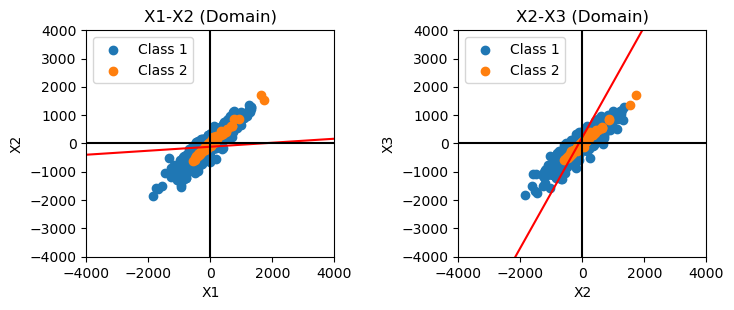

In [192]:
#Ho_Kashyp Discriminant Plot
plot_linear_discriminantfunction(X1,X2,W,'X',4000,"HoKashyp")

After Diagonalization
Iterations: 2
Confusion Matrix
  class1     class2   <<-- Classified as   
   1867       433          class1
   195        2105          class2
Accuracy: 0.8634782608695653


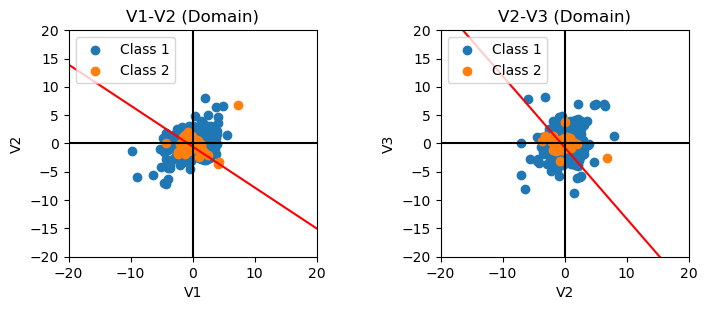

In [193]:
print("After Diagonalization")
EST_V1,EST_V2,EST_sigmaV1,EST_sigmaV2,EST_MV1,EST_MV2=diagonalize(X1,X2,ML_M1,ML_M2,ML_cov1,ML_cov2,False)
#EST_MV1,EST_MV2= Bayesian_Estimation(V1,V2,MV1,MV2,sigmaV1,sigmaV2)


Y1,Y2,W= Ho_Kashyp(EST_V1,EST_V2)
#print(W)
acc= Accuracy(Y1,Y2)
plot_linear_discriminantfunction(EST_V1,EST_V2,W,'V',20,"HoKashyp")

In [194]:
def k_fold_crossvalidation_HoKashyp(kfolds,X1,X2):
    dimension = X1.shape[0]
    lr = 0.9
    num_of_points = X1.shape[1]
    acc=[]
    tp = []
    fp = []
    tn = []
    fn = []
    # my dimension is 3*200 for simplyfying I did transpose 
    X1 = X1.T
    X2 = X2.T

    l= int(num_of_points/kfolds)
    iteration=1
    
    for i  in range(num_of_points):
        if(i%(num_of_points/kfolds)==0 and (i+l)<=num_of_points):
            train1 = []
            train2 = []
            test1=[]
            test2=[]
            print("Folds "+repr(iteration))
            iteration +=1
            for j in range(i,i+l):
                test1.append(X1[j])
                test2.append(X2[j])
            
            

            test1 = np.reshape(test1,(l,dimension))
            test2 = np.reshape(test2,(l,dimension))

#             test1 = test1.T
#             test2 = test2.T

            
            if(i==0):
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])
            else:
                
                for m in range(0,i):
                    train1.append(X1[m])
                    train2.append(X2[m])
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])

            train1 = np.reshape(train1,(num_of_points-l,dimension))
            train2 = np.reshape(train2,(num_of_points-l,dimension))
#             train1 = train1.T
#             train2 = train2.T
            
            ones = np.ones((test1.shape[0],1))
            test1 = np.concatenate((ones,test1),axis=1)
            test2 = np.concatenate((ones,test2),axis=1)
            #test2 = np.negative(test2)
            
            ones1 = np.ones((train1.shape[0],1))
            train1 = np.concatenate((ones1,train1),axis=1)
            train2 = np.concatenate((ones1,train2),axis=1)
            train2 = np.negative(train2)
            
            Y_test = np.concatenate((test1,test2),axis = 0)
            Y_train = np.concatenate((train1,train2),axis = 0)
            
            a = np.ones((train1.shape[1],1))
            b = np.ones(((train1.shape[0]+train2.shape[0]),1))
 
            Ya_train = Y_train @ a
            count = 0
            while(True):
        
                e = Ya_train - b
                #print(e)
                old_b = b
                b = old_b + lr* (e + np.abs(e))
                #result = Y.T * Y
                temp= np.linalg.inv((Y_train.T @ Y_train)) 
                a = temp @ Y_train.T @ b
                #print(np.shape(a))
                Ya_train = Y_train @ a

                count +=1
                if np.all(e>=0) or count>5000 or np.all(old_b ==b):
                    break
            Ya_test = Y_test @ a
            Y1,Y2 = np.split(Ya_test,2)
            print("Iterations: "+repr(count))


            tp1,fp1,tn1,fn1 = Accuracy(Y1,Y2)
            accu =  float((tp1+tn1)/(tp1+tn1+fp1+fn1))
            acc.append(accu)            
            tp.append(tp1)
            fp.append(fp1)
            tn.append(tn1)
            fn.append(fn1)
            
    print("Final Confusion Matrix")
    print("  class1     class2   <<-- Classified as   ")
    print("   "+repr(int(np.mean(tp)))+"       "+repr(int(np.mean(fn)))+"          class1")
    print("   "+repr(int(np.mean(fp)))+"        "+repr(int(np.mean(tn)))+"          class2")
    print("Final Accuracy(Ho-Kashyp): "+repr(np.mean(acc)))
    
    
           

    
    

In [195]:
k_fold_crossvalidation_HoKashyp(5,X1,X2)

Folds 1
Iterations: 6
Confusion Matrix
  class1     class2   <<-- Classified as   
   300       160          class1
   410        50          class2
Accuracy: 0.3804347826086957
Folds 2
Iterations: 6
Confusion Matrix
  class1     class2   <<-- Classified as   
   295       165          class1
   418        42          class2
Accuracy: 0.36630434782608695
Folds 3
Iterations: 5
Confusion Matrix
  class1     class2   <<-- Classified as   
   296       164          class1
   425        35          class2
Accuracy: 0.35978260869565215
Folds 4
Iterations: 5
Confusion Matrix
  class1     class2   <<-- Classified as   
   289       171          class1
   421        39          class2
Accuracy: 0.3565217391304348
Folds 5
Iterations: 5
Confusion Matrix
  class1     class2   <<-- Classified as   
   289       171          class1
   412        48          class2
Accuracy: 0.36630434782608695
Final Confusion Matrix
  class1     class2   <<-- Classified as   
   293       166          class1
   417 

In [196]:
k_fold_crossvalidation_HoKashyp(5,EST_V1,EST_V2)

Folds 1
Iterations: 4
Confusion Matrix
  class1     class2   <<-- Classified as   
   371       89          class1
   440        20          class2
Accuracy: 0.425
Folds 2
Iterations: 3
Confusion Matrix
  class1     class2   <<-- Classified as   
   345       115          class1
   435        25          class2
Accuracy: 0.40217391304347827
Folds 3
Iterations: 4
Confusion Matrix
  class1     class2   <<-- Classified as   
   341       119          class1
   439        21          class2
Accuracy: 0.3934782608695652
Folds 4
Iterations: 4
Confusion Matrix
  class1     class2   <<-- Classified as   
   344       116          class1
   446        14          class2
Accuracy: 0.38913043478260867
Folds 5
Iterations: 4
Confusion Matrix
  class1     class2   <<-- Classified as   
   335       125          class1
   423        37          class2
Accuracy: 0.4043478260869565
Final Confusion Matrix
  class1     class2   <<-- Classified as   
   347       112          class1
   436        23      

In [57]:
import operator
def distance_euclidean(x1, x2, length): #it is used for calculating euclidean distance
    d = 0
    for i in range(length):
        d += np.square(x1[i] - x2[i])
    d = np.sqrt(d)
    return d
def knn(train, test,y_train, k): #here we are defining our model
 
    
    #sort = {}
    distances = {}
    
    length = len(test)
    
    for i in range(len(train)):
        d = distance_euclidean(test, train[i], length)
        
        distances[i] = d
    sortedDistance = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    for i in range(k):
        neighbors.append(sortedDistance[i][0])
    CVote = {} #to get most frequent class of rows
    for i in range(len(neighbors)):
        classes = y_train[neighbors[i]][0]
        if classes in CVote:
            CVote[classes] += 1
        else:
            CVote[classes] = 1
    sortedvotes = sorted(CVote.items(), key=operator.itemgetter(1), reverse=True)
    return sortedvotes[0][0]
# testSet = [[6.8, 3.4, 4.8, 2.4]]
# test = pd.DataFrame(testSet)


In [58]:
def prepare_for_KNN(X1,X2):
    X = np.concatenate((X1.T,X2.T),axis=0)
    y1 = np.zeros((X1.shape[1],1))
    y2 = np.ones((X2.shape[1],1))
    Y = np.concatenate((y1,y2),axis=0)
    #X = np.concatenate((X,Y),axis = 1)
    #print(np.shape(Y))
    X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
    return np.asarray(X_train),np.asarray(X_test),np.asarray(y_train),np.asarray(y_test)
#     return np.asarray(X)

In [59]:
#Before Diagonaliation
x_train,x_test,y_train,y_test=prepare_for_KNN(X1,X2)
print(np.shape(y_test))
print(np.shape(X1))

(1518, 1)
(6, 2300)


In [60]:
k = 1
k1 = 3
result = []

for i in range (x_test.shape[0]):
    result.append(knn(x_train, x_test[i],y_train ,k1))
count = {}
for i in range(len(result)):
    if result[i]==y_test[i][0]:
        a = result[i]
        if a in count:
            count[a]+=1
        else:
            count[a] = 1
acc = sum(count.values())/x_test.shape[0]    
# result1,neigh1 = knn(data, test, k1)
print("Class1: "+repr(count[0]))
print("Class1: "+repr(count[1]))
print("Accuracy: "+repr(acc))


Class1: 625
Class1: 630
Accuracy: 0.8267457180500659


In [61]:
#after diagonalization
EST_V1,EST_V2,EST_sigmaV1,EST_sigmaV2,EST_MV1,EST_MV2=diagonalize(X1,X2,ML_M1,ML_M2,ML_cov1,ML_cov2,False)
#print(np,shape(EST_V1))
v_train,v_test,v_ytrain,v_ytest = prepare_for_KNN(EST_V1,EST_V2)
#print(np.shape(v_train))
k = 1
k1 = 3
result = []
for i in range (v_test.shape[0]):
    result.append(knn(v_train, v_test[i],v_ytrain, k1))
count = {}
for i in range(len(result)):
    if result[i]==v_ytest[i][0]:
        a = result[i]
        if a in count:
            count[a]+=1
        else:
            count[a] = 1
acc = sum(count.values())/v_test.shape[0]    
# result1,neigh1 = knn(data, test, k1)
print("Class1: "+repr(count[0]))
print("Class1: "+repr(count[1]))
print("Accuracy: "+repr(acc))

Class1: 620
Class1: 664
Accuracy: 0.8458498023715415


In [62]:
def K_fold_crossvalidation_KNN(kfolds,X1,X2):
    dimension = X1.shape[0]
    num_of_points = X1.shape[1]
    acc=[]
    tp = []
    fp = []
    tn = []
    fn = []
    # my dimension is 3*200 for simplyfying I did transpose 
    X1 = X1.T
    X2 = X2.T
    iteration =1
    l= int(num_of_points/kfolds)
    
    for i  in range(num_of_points):
        if(i%(num_of_points/kfolds)==0 and (i+l)<=num_of_points):
            train1 = []
            train2 = []
            test1=[]
            test2=[]
            print("Folds "+repr(iteration))
            iteration +=1
            for j in range(i,i+l):
                test1.append(X1[j])
                test2.append(X2[j])
            
            

            test1 = np.reshape(test1,(l,dimension))
            test2 = np.reshape(test2,(l,dimension))

#             test1 = test1.T
#             test2 = test2.T

            
            if(i==0):
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])
            else:
                
                for m in range(0,i):
                    train1.append(X1[m])
                    train2.append(X2[m])
                for k in range(i+l,num_of_points):
                    train1.append(X1[k])
                    train2.append(X2[k])

            train1 = np.reshape(train1,(num_of_points-l,dimension))
            train2 = np.reshape(train2,(num_of_points-l,dimension))
            train1_y = np.zeros((train1.shape[0],1))
            train2_y = np.ones((train2.shape[0],1))
            y_train = np.concatenate((train1_y,train2_y),axis=0)
            train = np.concatenate((train1,train2),axis=0)
            #train = np.concatenate((train,y_train),axis=1)
            
            test1_y = np.zeros((test1.shape[0],1))
            test2_y = np.ones((test2.shape[0],1))
            y_test = np.concatenate((test1_y,test2_y),axis=0)
            test= np.concatenate((test1,test2),axis=0)
            #test = np.concatenate((test,y_test),axis=1)
            
            
            k1 = 3
            result = []
            
            for i in range (test.shape[0]):
                result.append(knn(train, test[i],y_train, k1))
                
            count1 = {}
            count2 = {}
            test1,test2 = np.split(test,2)

            mid = int(len(result)/2)
            
            result1 = result[:mid]
            result2 = result[mid:]
            tp1=0
            fn1=0
            tn1=0
            fp1=0
            for i in range(len(result1)):
                if result1[i]==test1_y[i][0]:
                    tp1+=1
                else:
                    fn1+=1
                    
            for i in range(len(result2)):
                if result2[i]==test2_y[i][0]:
                    tn1+=1
                else:
                    fp1+=1
            
            accu =  float((tp1+tn1)/(tp1+tn1+fn1+fp1))
            acc.append(accu)            
            tp.append(tp1)
            fp.append(fp1)
            tn.append(tn1)
            fn.append(fn1)
            print("Accuracy: "+repr(accu))
            
    print("Final Confusion Matrix")
    print("  class1     class2   <<-- Classified as   ")
    print("   "+repr(int(np.mean(tp)))+"       "+repr(int(np.mean(fn)))+"          class1")
    print("   "+repr(int(np.mean(fp)))+"        "+repr(int(np.mean(tn)))+"          class2")
    print("Final Accuracy(KNN): "+repr(np.mean(acc)))      
                    

    
    

In [63]:
K_fold_crossvalidation_KNN(5,X1,X2)

Folds 1
Accuracy: 0.8108695652173913
Folds 2
Accuracy: 0.8467391304347827
Folds 3
Accuracy: 0.8315217391304348
Folds 4
Accuracy: 0.8369565217391305
Folds 5
Accuracy: 0.825
Final Confusion Matrix
  class1     class2   <<-- Classified as   
   365       94          class1
   61        398          class2
Final Accuracy(KNN): 0.8302173913043477


In [64]:
K_fold_crossvalidation_KNN(5,EST_V1,EST_V2)

Folds 1
Accuracy: 0.8293478260869566
Folds 2
Accuracy: 0.8402173913043478
Folds 3
Accuracy: 0.8521739130434782
Folds 4
Accuracy: 0.85
Folds 5
Accuracy: 0.8260869565217391
Final Confusion Matrix
  class1     class2   <<-- Classified as   
   362       97          class1
   50        410          class2
Final Accuracy(KNN): 0.8395652173913044


In [65]:
def myCov(X1,Parzen_M1,X2,Parzen_M2):
    demeaned1 = X1-Parzen_M1
    Pcov1 = (demeaned1 @ demeaned1.T) / (X1.shape[1]-1)

    demeaned2 = X2-Parzen_M2
    Pcov2 = (demeaned2 @ demeaned2.T) / (X1.shape[1]-1)
    
    return Pcov1,Pcov2

In [66]:
def GaussianKernel(X,x,b):
    return (1./(np.sqrt(2 * np.pi) * b)) * np.exp(-np.square((X-x))/(2* b **2)).mean()
def Parzen(X,P, b):
    
    estimates = []
    for i in range (0,X.shape[0]):
        estimates_i = []
        estimates.append(estimates_i)
        for p  in P[i,:]:
            a = GaussianKernel(X[i,:],p,b)
            estimates_i.append(GaussianKernel(X[i,:],p,b))
        estimates_i = np.array(estimates_i)
        estimates[i]  = np.array(estimates_i / estimates_i.sum())
    
    #print(np.shape(a))
    return np.array(estimates)
def Grid(a):
    Min = a.min(axis = 1)
    Max = a.max(axis = 1)
    l = []
    for i in range(0,a.shape[0]):
        l.append(np.linspace(Min[i],Max[i],60))
    return np.array(l)
def plotParzen(points,estimates,legend):
#     fig,axs = plt.subplots(1, estimates.shape[0])
#     fig.subplots_adjust(wspace=0.8)
   
#     for i in range(0,estimates.shape[0]):
#         axs[i].set_title("Final Distribution of X"+repr(i))
#         axs[i].set_xlabel("X"+repr(i))
#         axs[i].set_ylabel("estimation")
#         axs[i].plot(points[i,:],estimates[i,:])
    plt.plot(points[0,:],estimates[0,:],label=legend)
    plt.title("Final distribution of X0")
    plt.xlabel("X0")
    plt.ylabel("Estimation")
    plt.legend(loc='upper left')
    plt.show()
def plotParzen1(points,estimates,legend):
    #for after diagonalization plot
#     fig,axs = plt.subplots(1, estimates.shape[0])
#     fig.subplots_adjust(wspace=0.8)
   
#     for i in range(0,estimates.shape[0]):
#         axs[i].set_title("Final Distribution of V"+repr(i))
#         axs[i].set_xlabel("V"+repr(i))
#         axs[i].set_ylabel("estimation")
#         axs[i].plot(points[i,:],estimates[i,:])
    plt.plot(points[0,:],estimates[0,:],label=legend)
    plt.title("Final distribution of V0")
    plt.xlabel("V0")
    plt.ylabel("Estimation")
    plt.legend(loc='upper left')
    plt.show()

        
def exp (n,prob):
    return (n * prob).sum()


421.49698908534737


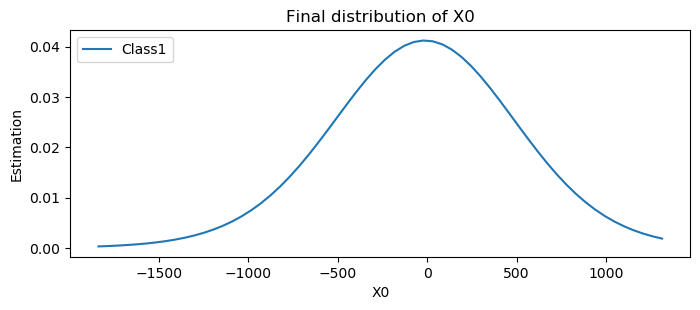

117.6052373063354


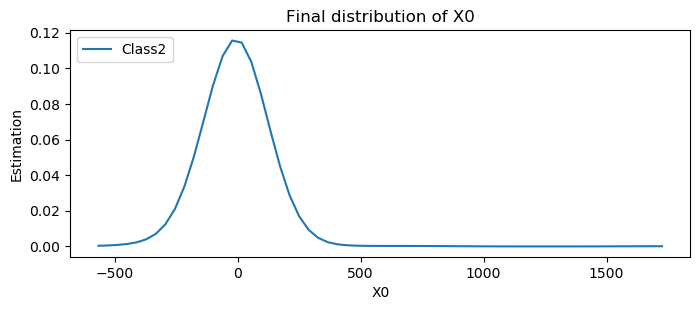

In [68]:
# before diagonalization
var1 = np.var(X1[0,:],ddof=1)
h1 = np.sqrt(np.power((4* var1**5)/3*X1.shape[0],(1/5)))
print(h1)
c1_grid = Grid(X1)
est_c1 = Parzen(X1,c1_grid,h1)
plotParzen(c1_grid,est_c1,'Class1')

var2 = np.var(X2[0,:],ddof=1)
h2 = np.sqrt(np.power((4* var2**5)/3*X2.shape[0],(1/5)))
print(h2)

c2_grid = Grid(X2)
est_c2 = Parzen(X2,c2_grid,h2)
plotParzen(c2_grid,est_c2,'Class2')

1.2056309796406908


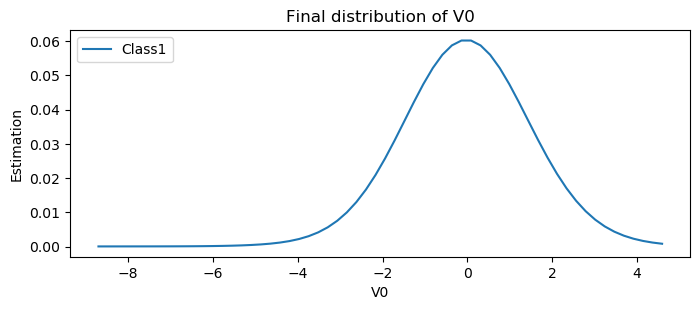

0.4502832505225335


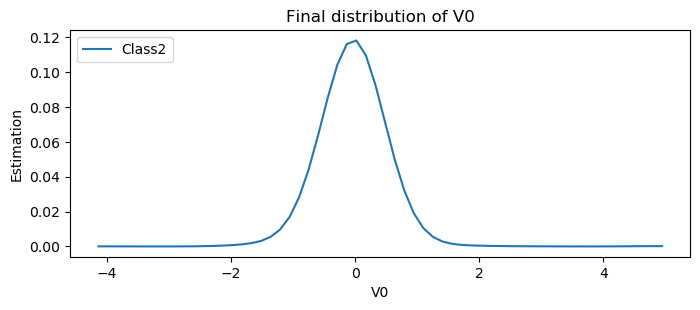

In [70]:
#after diagonalization
var1 = np.var(EST_V1[0,:],ddof=1)
h1 = np.sqrt(np.power((4* var1**5)/3*EST_V1.shape[0],(1/5)))
print(h1)

Parzen_M1 = np.array([[exp(c1_grid[0], est_c1[0]),
                       exp(c1_grid[1], est_c1[1]),
                       exp(c1_grid[2], est_c1[2]),
                       exp(c1_grid[3], est_c1[3]),
                       exp(c1_grid[4], est_c1[4]),
                       exp(c1_grid[5], est_c1[5])]]).T
Parzen_M2 = np.array([[exp(c2_grid[0], est_c2[0]),
                       exp(c2_grid[1], est_c2[1]),
                       exp(c2_grid[2], est_c2[2]),
                       exp(c2_grid[3], est_c2[3]),
                       exp(c2_grid[4], est_c2[4]),
                       exp(c2_grid[5], est_c2[5])]]).T
EST_cov1,EST_cov2 = myCov(X1,Parzen_M1,X2,Parzen_M2)



EST_V1,EST_V2,EST_sigmaV1,EST_sigmaV2,EST_MV1,EST_MV2=diagonalize(X1,X2,Parzen_M1,Parzen_M2,EST_cov1,EST_cov2,False)


V_c1_grid = Grid(EST_V1)
V_est_c1 = Parzen(EST_V1,V_c1_grid,h1)
plotParzen1(V_c1_grid,V_est_c1,'Class1')

var2 = np.var(EST_V2[0,:],ddof=1)
h2 = np.sqrt(np.power((4* var2**5)/3*EST_V2.shape[0],(1/5)))
print(h2)

V_c2_grid = Grid(EST_V2)
V_est_c2 = Parzen(EST_V2,V_c2_grid,h2)
plotParzen1(V_c2_grid,V_est_c2,'Class2')

In [71]:
print("Before diagonalization")
print("Class1")
print("Mean of X0: "+repr(round(Parzen_M1[0][0],2)))
print("variance of X0: "+repr(round(EST_cov1[0][0],2)))
# print("Mean of X1: "+repr(round(Parzen_M1[1][0],2)))
# print("variance of X1: "+repr(round(EST_cov1[1][1],2)))
# print("Mean of X2: "+repr(round(Parzen_M1[2][0],2)))
# print("variance of X2: "+repr(round(EST_cov1[2][2],2)))
# print()
# print()
print("Class2")
print("Mean of X0: "+repr(round(Parzen_M2[0][0],2)))
print("variance of X0: "+repr(round(EST_cov2[0][0],2)))
# print("Mean of X1: "+repr(round(Parzen_M2[1][0],2)))
# print("variance of X1: "+repr(round(EST_cov2[1][1],2)))
# print("Mean of X2: "+repr(round(Parzen_M2[2][0],2)))
# print("variance of X2: "+repr(round(EST_cov2[2][2],2)))

Before diagonalization
Class1
Mean of X0: -30.07
variance of X0: 117277.93
Class2
Mean of X0: -7.79
variance of X0: 9125.06


In [72]:
print("After diagonalization")
print("Class1")
print("Mean of V0: "+repr(round(EST_MV1[0][0],2)))
print("variance of V0: "+repr(round(EST_sigmaV1[0][0],2)))
# print("Mean of V1: "+repr(round(EST_MV1[1][0],2)))
# print("variance of V1: "+repr(round(EST_sigmaV1[1][1],2)))
# print("Mean of V2: "+repr(round(EST_MV1[2][0],2)))
# print("variance of V2: "+repr(round(EST_sigmaV1[2][2],2)))
# print()
# print()
print("Class2")
print("Mean of V0: "+repr(round(EST_MV2[0][0],2)))
print("variance of V0: "+repr(round(EST_sigmaV2[0][0],2)))
# print("Mean of V1: "+repr(round(EST_MV2[1][0],2)))
# print("variance of V1: "+repr(round(EST_sigmaV2[1][1],2)))
# print("Mean of V2: "+repr(round(EST_MV2[2][0],2)))
# print("variance of V2: "+repr(round(EST_sigmaV2[2][2],2)))

After diagonalization
Class1
Mean of V0: -0.23
variance of V0: 1.0
Class2
Mean of V0: -0.03
variance of V0: 0.13
